# **🧰 Section: Importing Libraries**

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_colwidth",300)
pd.set_option("display.max_column",30)


## **Storytelling:**
#### *Every great data story starts with gathering the right tools. Here, you're importing essential libraries for data handling and visualization:*

#### *Pandas for data manipulation,*

#### *Seaborn and Matplotlib for static visualizations,*

#### *Plotly Express for interactive plots.*

# **<p style="color:Orange;">Project:</p>**

## **<p style="color:#3498db;">📈 Section: Sales Analysis**

In [148]:
df=pd.read_csv(r"c:\Users\user\Desktop\Cleaned Dataset CSV\Sales Dataset.csv")

### `First And Last 5 rows`

In [149]:
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


In [150]:
df.tail()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,995,2023-05-16,Male,62,Clothing,1,50,50
996,996,2023-11-17,Male,52,Beauty,3,30,90
997,997,2023-10-29,Female,23,Beauty,4,25,100
998,998,2023-12-05,Female,36,Electronics,3,50,150
999,999,2023-04-12,Male,47,Electronics,4,30,120


## **<p style="color:#3498db;">🧹 Section: Data Handling and Cleaning**

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [152]:
df["Date"]=pd.to_datetime(df["Date"])

In [153]:
df.shape

(1000, 8)

### *<p style="color:Orange;">The Dataset contains 1000 rows and 8 columns*

In [154]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [155]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [156]:
df.rename(columns={"Total Amount": "Total Sales"}, inplace=True)

## **<p style="color:#3498db;">EDA & Visualization**

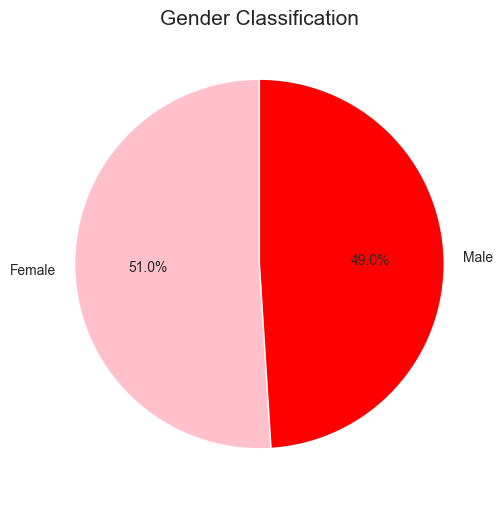

In [157]:
gender_counts=df["Gender"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%",startangle=90,colors=["pink","red"])
plt.title("Gender Classification",fontsize=15)
plt.show()

### `Average Age Of Customers By Their Gender`

<Figure size 800x600 with 0 Axes>

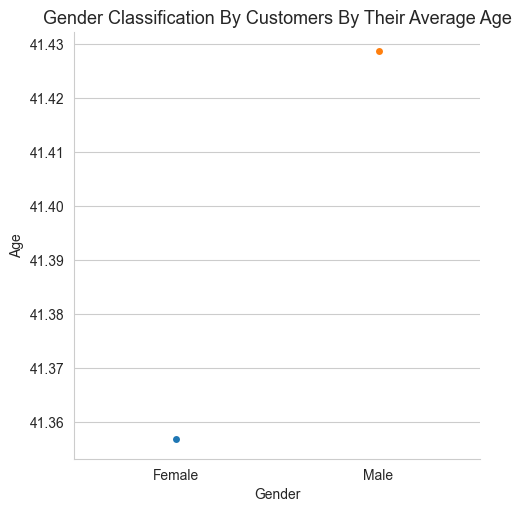

In [158]:
classifi_age=df.groupby("Gender")["Age"].mean().reset_index()
classifi_age
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.catplot(data=classifi_age,x="Gender",y="Age",hue="Gender")
plt.title("Gender Classification By Customers By Their Average Age",fontsize=13)
plt.show()


### *<p style="color:Orange;">As we can see almost the same average age between two genders*

In [159]:
classifi_g=df.groupby(["Gender","Product Category"]).agg({
    "Age":"mean",
    "Quantity":"sum"
}).reset_index()
classifi_g.style.background_gradient(cmap="Oranges")

,Gender,Product Category,Age,Quantity
0,Female,Beauty,40.355422,418
1,Female,Clothing,43.166667,441
2,Female,Electronics,40.482353,439
3,Male,Beauty,40.390071,353
4,Male,Clothing,40.751412,453
5,Male,Electronics,42.976744,410


### `How Many Product People Bought By Category And The Average Age Of Each Gender`

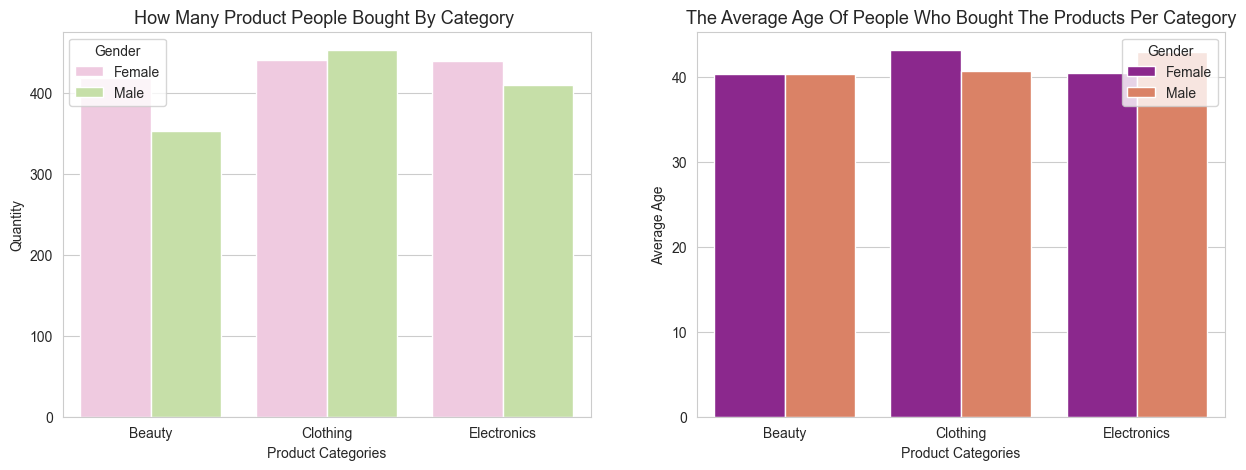

In [160]:
classifi_g=df.groupby(["Gender","Product Category"]).agg({
    "Age":"mean",
    "Quantity":"sum"
}).reset_index()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=classifi_g,x="Product Category",y="Quantity",hue="Gender",palette="PiYG")
plt.title("How Many Product People Bought By Category ",fontsize=13)
plt.xlabel("Product Categories")
plt.ylabel("Quantity")


plt.subplot(1,2,2)
sns.barplot(data=classifi_g,x="Product Category",y="Age",hue="Gender",palette="plasma")
plt.title("The Average Age Of People Who Bought The Products Per Category",fontsize=13)
plt.xlabel("Product Categories")
plt.ylabel("Average Age")
plt.show()


### `Total Sales Per Product Categorry`

In [161]:
classifi_sale=df.groupby(["Gender","Product Category"])["Total Sales"].sum().sort_values(ascending=False).reset_index()
classifi_sale.style.background_gradient(cmap="Greens")

,Gender,Product Category,Total Sales
0,Female,Clothing,81275
1,Male,Electronics,80170
2,Female,Electronics,76735
3,Female,Beauty,74830
4,Male,Clothing,74305
5,Male,Beauty,68685


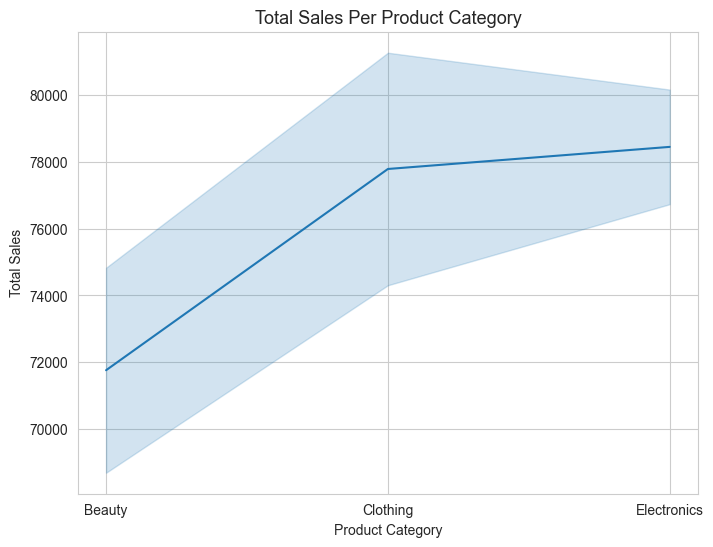

In [162]:
classifi_sale=df.groupby(["Gender","Product Category"])["Total Sales"].sum().reset_index()
fig=px.bar(classifi_sale,x="Product Category",y="Total Sales",color="Gender",title="Total Sales Per Product Category By Gender Ratio")
fig.update_layout(height=500,width=600)
fig.show()

plt.figure(figsize=(8,6))
sns.lineplot(data=classifi_sale,x="Product Category",y="Total Sales")
plt.title("Total Sales Per Product Category",fontsize=13)
plt.show()

### `Total Sales,Price Per Unit & Category Classification`

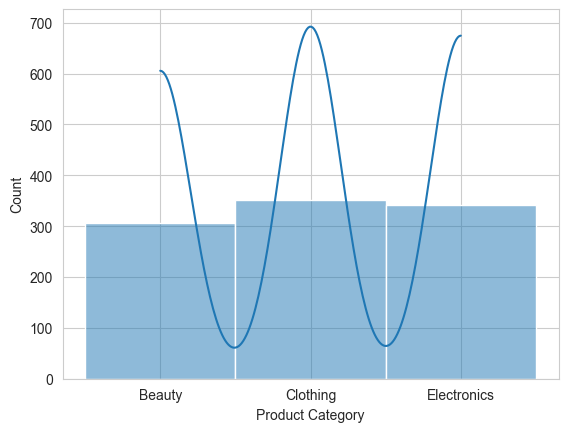

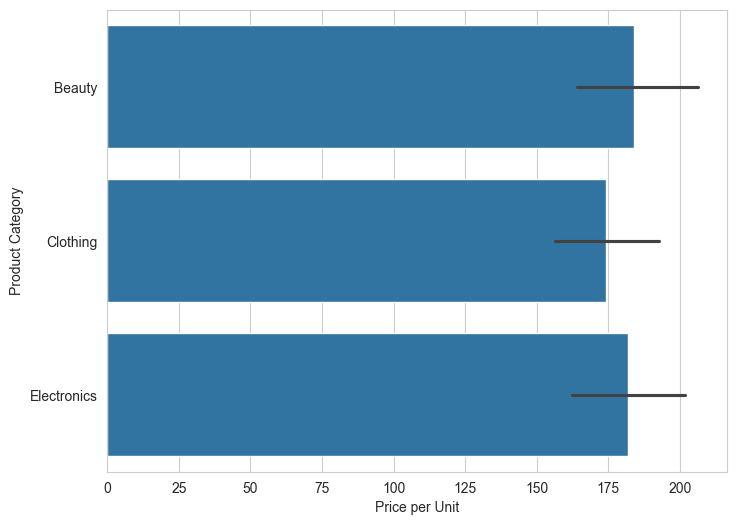

In [163]:

sns.histplot(data=df,x="Product Category",kde=True)

plt.figure(figsize=(8,6))
sns.set_color_codes("pastel")
sns.barplot(data=df,x="Price per Unit",y="Product Category")
plt.show()

fig=px.bar(df,x="Product Category",y="Price per Unit")
fig.show()


### `Time-Series Analysis`

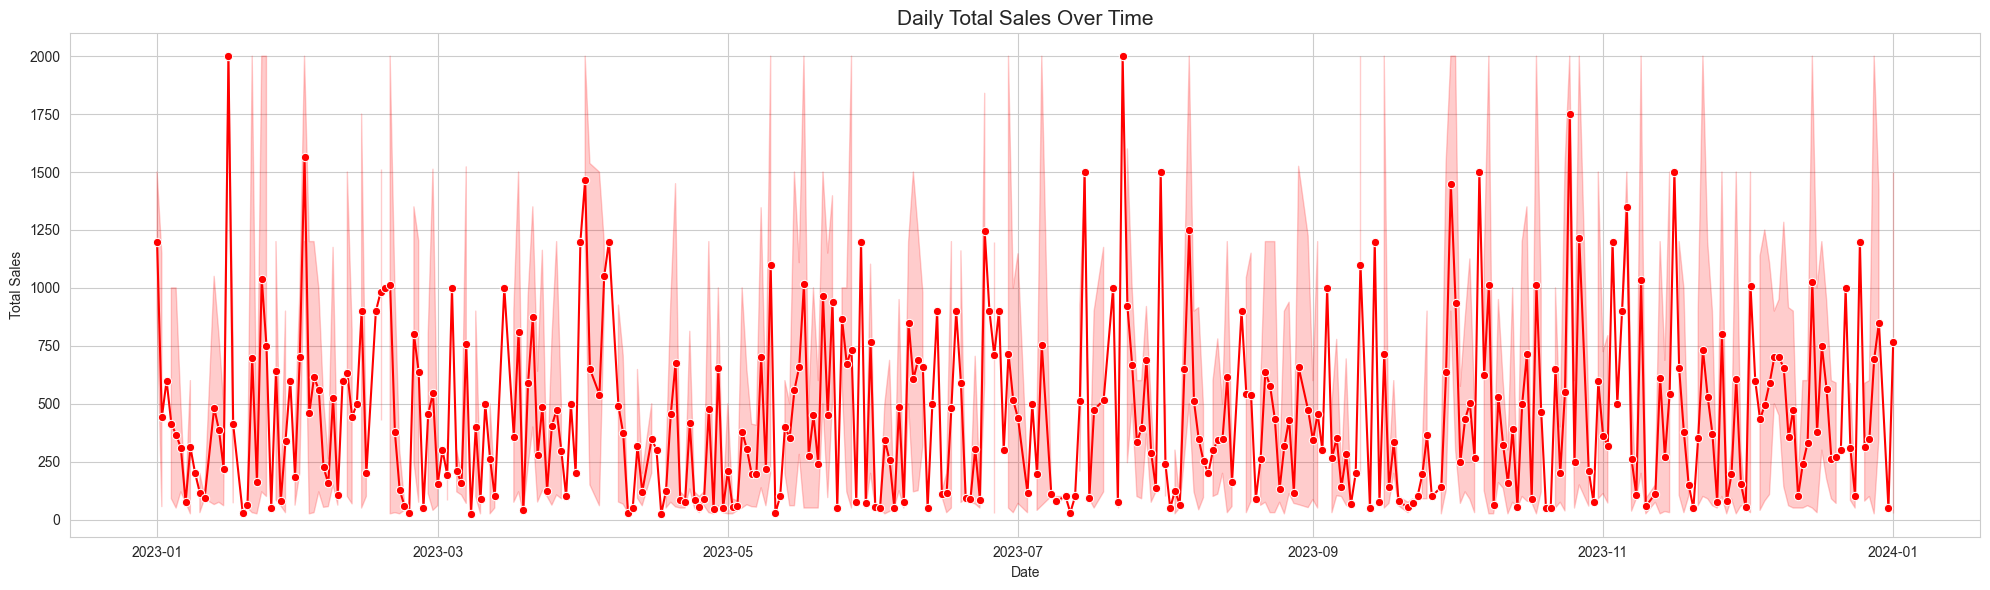

In [167]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df, x='Date', y='Total Sales', marker='o',color="red")
plt.title('Daily Total Sales Over Time', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### `Correlation Heatmap`

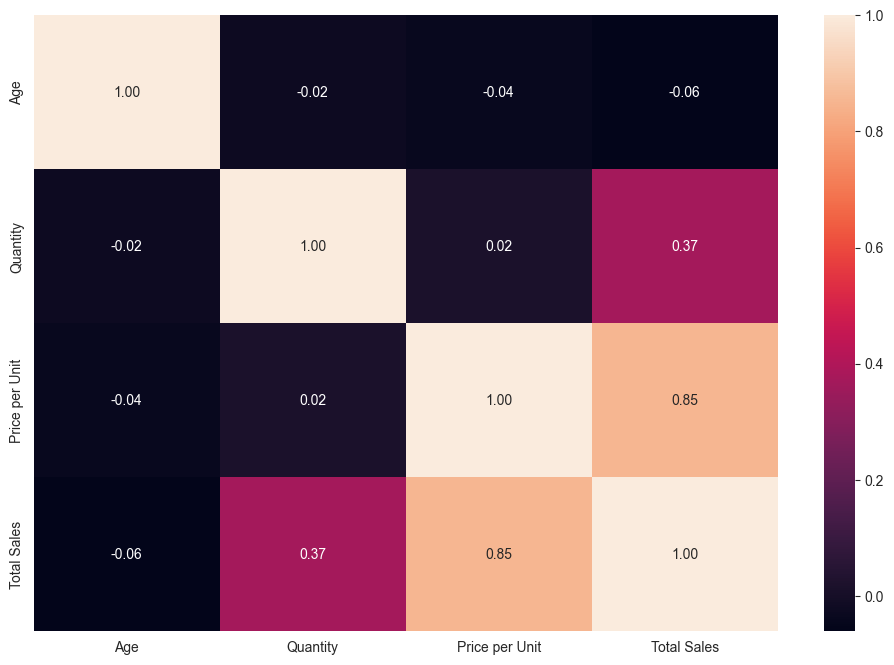

In [172]:
plt.figure(figsize=(12,8))
cor=df.select_dtypes(include="number").corr()
sns.heatmap(cor,annot=True,fmt=".2f")
plt.show()

## **<p style="color:#3498db;">The Motive And The Bigger Picture**
### *<p style="color:Orange;">My analysis showed Clothing drove volume, Electronics high revenue, and Beauty balanced both. This could guide stocking or marketing strategies.*

### *<p style="color:Orange;"> Why: I focused on Product Category and Price per Unit to understand sales drivers and profitability.*

### *<p style="color:Orange;"> Story: I uncovered the marketplace’s rhythm—Clothing drew crowds, Electronics brought riches, Beauty kept things steady. My findings could steer the market to thrive*

## **<p style="color:#3498db;"> More To Explore**

### *<p style="color:Orange;">My journey revealed key patterns, but the scroll holds more. I could analyze Total Sales by Gender, Age, or Date, or plot trends over time. As I rolled up the scroll, I knew I’d return to uncover more of the marketplace’s secrets with my data tools.*